In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('energy_data.csv')
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [3]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility'],
      dtype='object')

In [4]:
df['lights'].value_counts()

0     775
10    101
20     90
30     29
40      5
Name: lights, dtype: int64

In [5]:
df = df.drop('lights',axis = 1)
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,18.060000,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,19.390000,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,18.426667,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,15.390000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,19.600000,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,20.790000,40.590000,19.166667,40.400000,20.200000,40.09,20.200000,38.230000,18.700000,...,37.400000,21.000000,47.400000,17.600000,40.433333,-4.000000,761.650000,86.500000,2.500000,26.000000
996,70,22.000000,35.200000,19.463333,37.163333,21.390000,34.50,20.390000,36.200000,19.823333,...,29.356667,22.790000,39.560000,19.000000,34.030000,3.166667,754.766667,85.500000,1.000000,40.000000
997,40,21.790000,42.360000,19.633333,46.456667,22.200000,38.59,21.200000,39.530000,19.790000,...,36.397500,21.790000,42.060000,19.730000,40.326667,8.100000,756.200000,83.000000,4.000000,24.000000
998,70,21.260000,35.290000,20.500000,34.000000,20.290000,36.06,21.000000,33.900000,17.963333,...,28.290000,23.963333,33.860000,19.200000,38.700000,8.500000,769.233333,60.333333,6.000000,24.000000


In [6]:
df.isna().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
dtype: int64

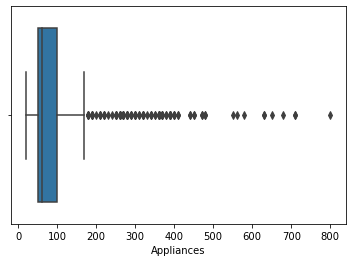

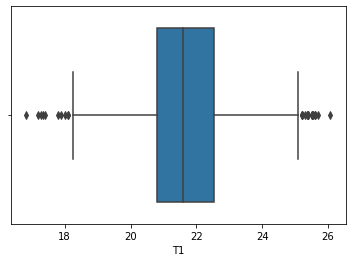

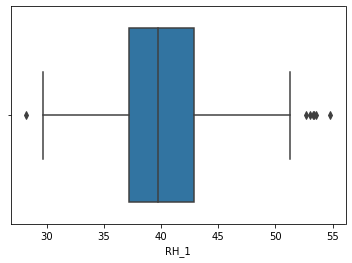

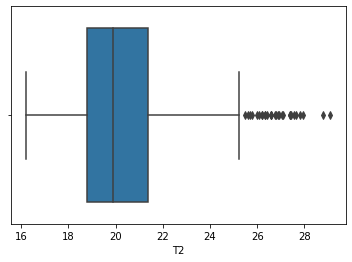

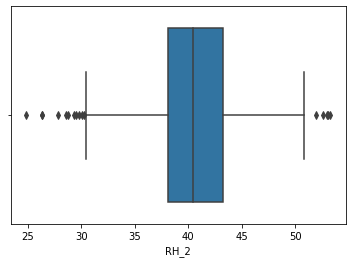

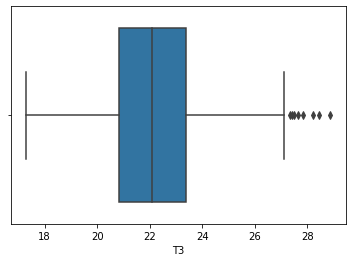

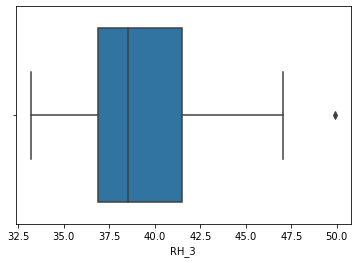

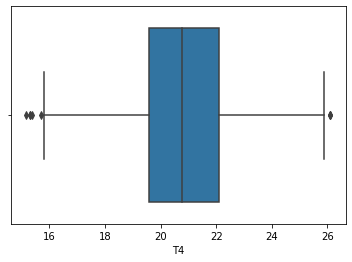

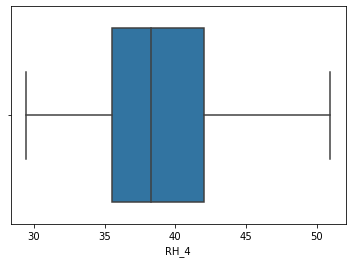

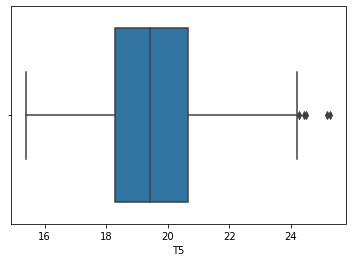

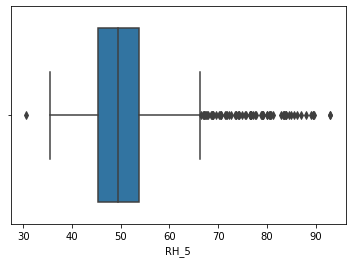

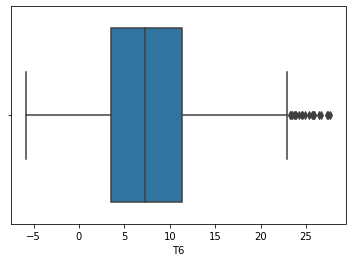

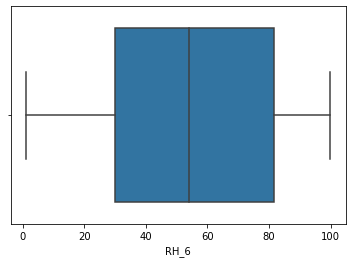

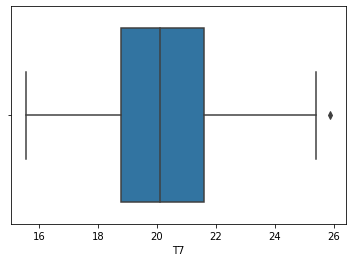

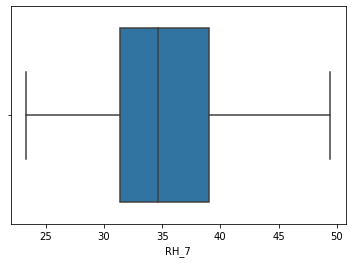

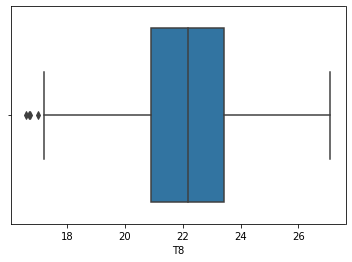

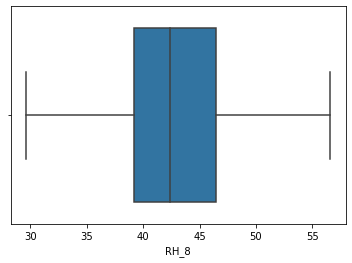

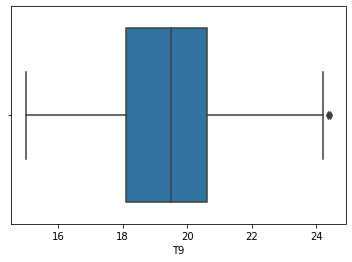

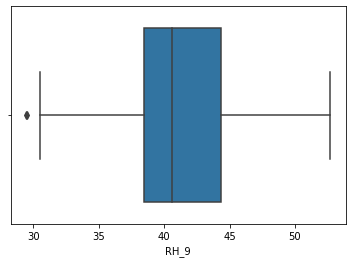

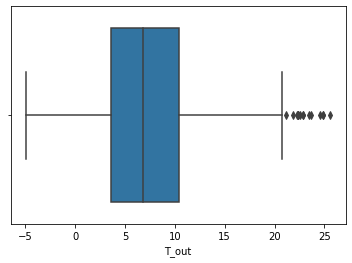

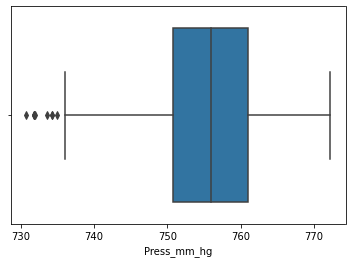

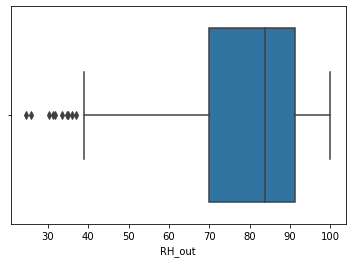

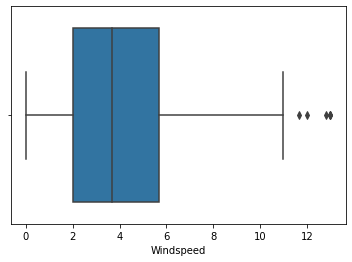

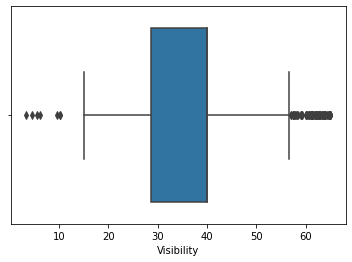

In [7]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [8]:
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    df[i] = df[i].replace(df[df[i]>ub][i],df[i].quantile(0.9))
    df[i] = df[i].replace(df[df[i]<lb][i],df[i].quantile(0.01))

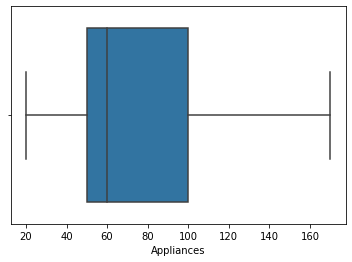

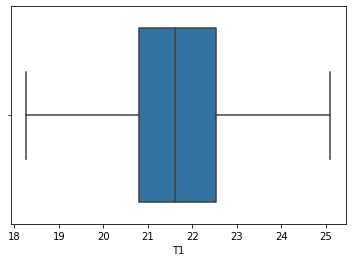

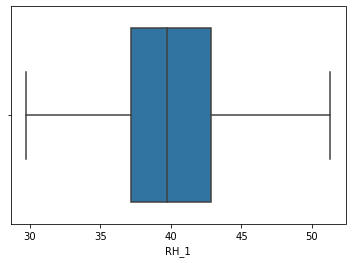

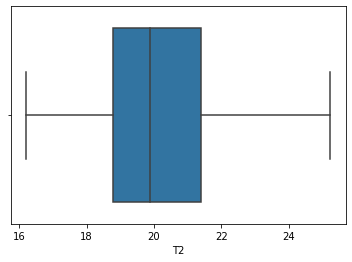

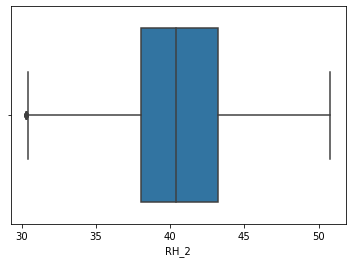

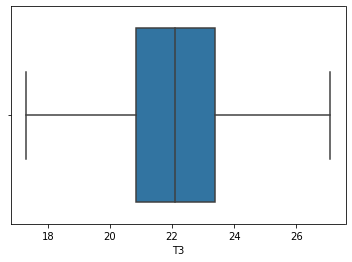

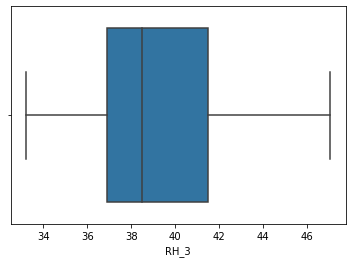

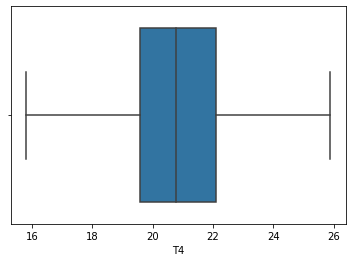

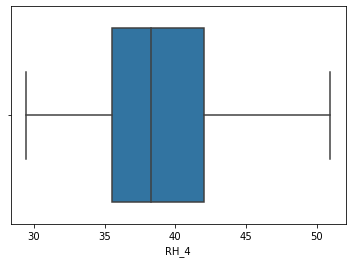

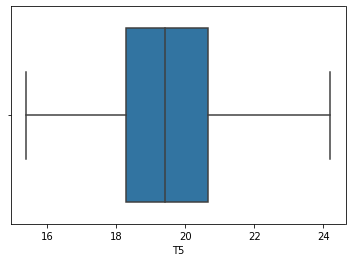

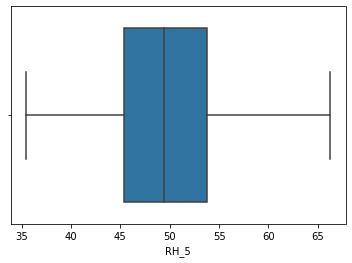

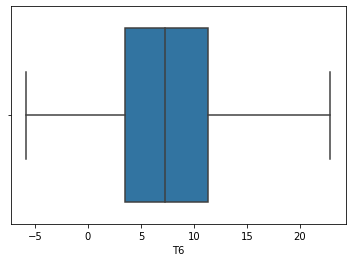

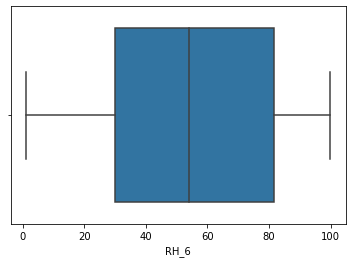

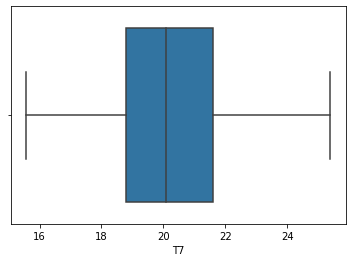

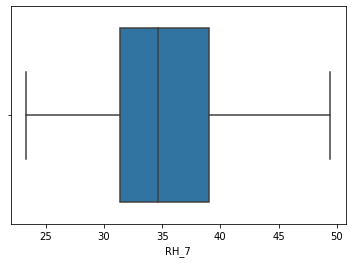

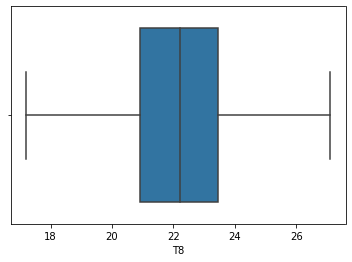

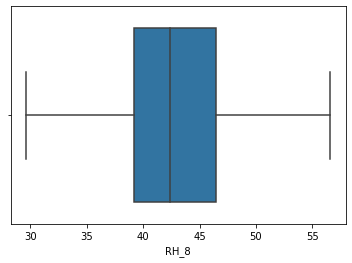

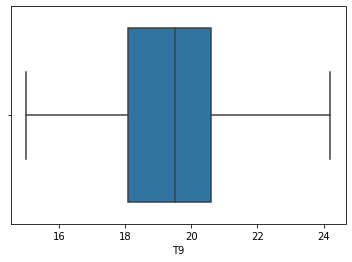

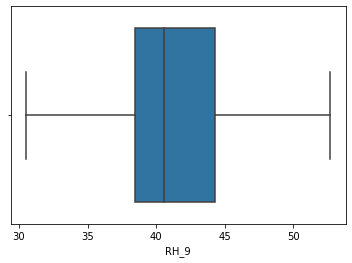

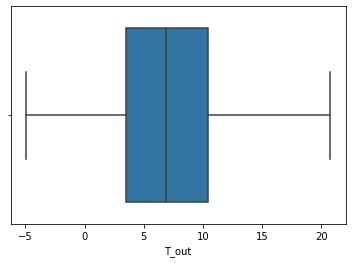

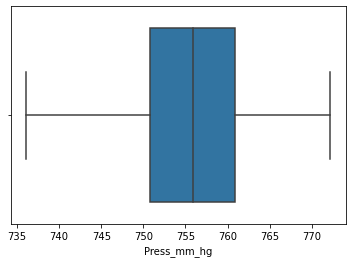

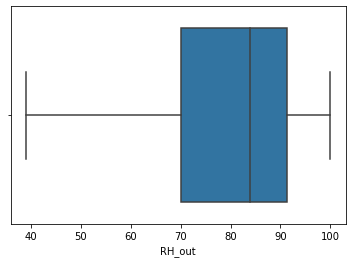

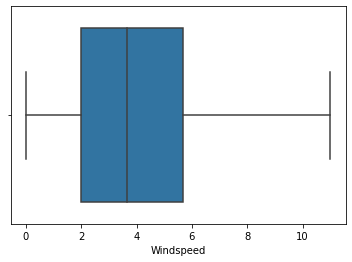

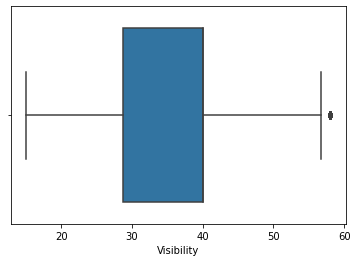

In [9]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
inp = df.drop('Appliances',axis=1)
out = df['Appliances']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data_sc = sc.fit_transform(inp)
data_sc=pd.DataFrame(data_sc,columns=inp.columns)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data_sc.values,i) for i in range(data_sc.shape[1])]
vif['Features']=data_sc.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
16,23.588606,T9
10,20.561874,T6
18,20.140849,T_out
7,16.907077,RH_4
12,15.267661,T7
2,13.955872,T2
0,13.404370,T1
1,11.995605,RH_1
3,10.731543,RH_2
13,10.309529,RH_7


In [14]:
inpv1 = data_sc.drop(['T9','T6','RH_4'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Features']=inpv1.columns
vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
0,12.462406,T1
1,11.518129,RH_1
2,11.507273,T2
3,10.133529,RH_2
4,8.572502,T3
5,8.753880,RH_3
6,6.828594,T4
7,7.232864,T5
8,1.658469,RH_5
9,8.546468,RH_6


In [15]:
import statsmodels.api as sm

In [16]:
inpc = sm.add_constant(inpv1)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     19.42
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           5.54e-58
Time:                        18:28:05   Log-Likelihood:                -4899.6
No. Observations:                1000   AIC:                             9841.
Df Residuals:                     979   BIC:                             9944.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          76.4900      1.038     73.680      0.000      74.453      78.527
T1             -9.9319      3.665     -2.710      0.007     -17.124      -2.740
RH_1           16.9556      3.523      4.812      0.000      10.042      23.870
T2              0.2190      3.522      0.062      0.950      -6.692       7.130
RH_2           -8.9961      3.305     -2.722      0.007     -15.481      -2.511
T3             15.3769      3.040      5.059      0.000       9.412      21.342
RH_3           11.8360      3.072      3.853      0.000       5.808      17.864
T4              2.8285      2.713      1.043      0.297      -2.495       8.152
T5             -3.2330      2.792     -1.158      0.247      -8.712       2.246
RH_5            2.2066      1.337      1.651      0.099      -0.417       4.830
RH_6            4.3907      3.035      1.447      0.148      -1.565      10.346
T7            -18.5453      3.398     -5.457      0.000     -25.214     -11.877
RH_7            0.2230      3.099      0.072      0.943      -5.858       6.304
T8             20.1197      2.849      7.063      0.000      14.530      25.710
RH_8          -24.2265      3.072     -7.886      0.000     -30.256     -18.198
RH_9           -5.2980      2.525     -2.098      0.036     -10.253      -0.343
T_out           2.6673      2.615      1.020      0.308      -2.465       7.800
Press_mm_hg     0.5471      1.238      0.442      0.659      -1.882       2.976
RH_out         -1.6168      2.381     -0.679      0.497      -6.289       3.055
Windspeed       3.3833      1.303      2.597      0.010       0.826       5.940
Visibility     -0.6835      1.067     -0.641      0.522      -2.777       1.410
==============================================================================
Omnibus:                      139.427   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.182
Skew:                           0.993   Prob(JB):                     7.58e-45
Kurtosis:                       3.967   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
ols_mod.resid.skew()

0.9942007534589373

In [18]:
box_out,lam = stats.boxcox(out)

In [19]:
inpc = sm.add_constant(inpv1)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()
ols_mod.resid.skew()

0.060393254424486134

In [20]:
pval = ols_mod.pvalues
pval

const          0.000000e+00
T1             2.091491e-02
RH_1           1.195880e-05
T2             4.299469e-01
RH_2           2.997511e-02
T3             7.988191e-05
RH_3           3.798582e-03
T4             7.420774e-02
T5             4.248807e-01
RH_5           7.244839e-02
RH_6           2.040620e-01
T7             1.028724e-09
RH_7           4.502226e-01
T8             9.190001e-15
RH_8           3.867302e-16
RH_9           1.595528e-01
T_out          6.547417e-01
Press_mm_hg    8.857048e-01
RH_out         4.214455e-01
Windspeed      7.373749e-03
Visibility     3.138010e-01
dtype: float64

In [21]:
pval[pval > 0.05]

T2             0.429947
T4             0.074208
T5             0.424881
RH_5           0.072448
RH_6           0.204062
RH_7           0.450223
RH_9           0.159553
T_out          0.654742
Press_mm_hg    0.885705
RH_out         0.421445
Visibility     0.313801
dtype: float64

In [22]:
inpv2 = inpv1.copy()

In [61]:
while(len(inpv2.columns)>0):
    inpc = sm.add_constant(inpv2)
    ols = sm.OLS(box_out,inpc)
    ols_mod = ols.fit()
    f = ols_mod.pvalues[1:].idxmax()
    if ols_mod.pvalues[1:].max() > 0.05:
        inpv2 = inpv2.drop(f,axis = 1)
    else:
        break
print('The final features are:',inpv2.columns)

The final features are: Index(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'T7', 'T8', 'RH_8',
       'Windspeed'],
      dtype='object')


In [24]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     20.96
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.75e-62
Time:                        21:26:00   Log-Likelihood:                -96.538
No. Observations:                1000   AIC:                             235.1
Df Residuals:                     979   BIC:                             338.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4560      0.009    405.770      0.000       3.439       3.473
T1             -0.0696      0.030     -2.313      0.021      -0.129      -0.011
RH_1            0.1272      0.029      4.401      0.000       0.070       0.184
T2              0.0228      0.029      0.790      0.430      -0.034       0.080
RH_2           -0.0589      0.027     -2.174      0.030      -0.112      -0.006
T3              0.0988      0.025      3.961      0.000       0.050       0.148
RH_3            0.0731      0.025      2.901      0.004       0.024       0.123
T4              0.0398      0.022      1.787      0.074      -0.004       0.083
T5             -0.0183      0.023     -0.798      0.425      -0.063       0.027
RH_5            0.0197      0.011      1.798      0.072      -0.002       0.041
RH_6            0.0316      0.025      1.271      0.204      -0.017       0.081
T7             -0.1719      0.028     -6.165      0.000      -0.227      -0.117
RH_7            0.0192      0.025      0.755      0.450      -0.031       0.069
T8              0.1840      0.023      7.872      0.000       0.138       0.230
RH_8           -0.2088      0.025     -8.285      0.000      -0.258      -0.159
RH_9           -0.0292      0.021     -1.408      0.160      -0.070       0.011
T_out           0.0096      0.021      0.447      0.655      -0.033       0.052
Press_mm_hg    -0.0015      0.010     -0.144      0.886      -0.021       0.018
RH_out         -0.0157      0.020     -0.804      0.421      -0.054       0.023
Windspeed       0.0287      0.011      2.685      0.007       0.008       0.050
Visibility     -0.0088      0.009     -1.008      0.314      -0.026       0.008
==============================================================================
Omnibus:                        9.007   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.487
Skew:                           0.060   Prob(JB):                      0.00194
Kurtosis:                       3.534   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#! pip install mlxtend

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
backward = sfs(estimator=lr,k_features=8,forward=False,scoring='r2')
sfs_backward = backward.fit(inpv1,box_out)

In [29]:
feat_back = sfs_backward.k_feature_names_
feat_back

('RH_1', 'RH_2', 'T3', 'RH_3', 'T7', 'T8', 'RH_8', 'Windspeed')

In [30]:
sfs_backward.k_score_

0.2640539185390379

In [31]:
lr = LinearRegression()
forward = sfs(estimator=lr,k_features='best',forward=True,scoring='neg_mean_squared_error')
sfs_forward = forward.fit(inpv1,box_out)

In [32]:
feat_forward = sfs_forward.k_feature_names_
feat_forward

('T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'T5',
 'RH_5',
 'T7',
 'T8',
 'RH_8',
 'RH_9',
 'RH_out',
 'Windspeed')

In [33]:
sfs_forward.k_score_

-0.07359703081949001

In [34]:
#RFE

In [35]:
from sklearn.feature_selection import RFECV

In [36]:
lr = LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(inpv1,box_out)

In [37]:
rfe_mod.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1])

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inpv1,box_out,test_size = 0.3,random_state = 48)

In [39]:
lr = LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(xtrain,ytrain)
rfe_mod.ranking_

array([ 2,  1,  7,  1,  1,  1,  3,  5, 13,  8,  1,  4,  1,  1, 11, 12, 10,
        9,  6, 14])

In [40]:
rank = pd.DataFrame()

In [41]:
rank['Features'] = xtrain.columns
rank['Rank'] = rfe_mod.ranking_
feat_rfe = rank[rank['Rank']==1]['Features']
feat_rfe

1     RH_1
3     RH_2
4       T3
5     RH_3
10      T7
12      T8
13    RH_8
Name: Features, dtype: object

In [42]:
lr=LinearRegression()
backward=sfs(estimator=lr,k_features='best',forward=False,scoring='r2')
sfs_backward=backward.fit(xtrain,ytrain)
feat_back=sfs_backward.k_feature_names_
print(feat_back)
sfs_backward.k_score_

('T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T7', 'RH_7', 'T8', 'RH_8', 'Windspeed')


0.2642922233769216

In [43]:
lr=LinearRegression()
forward=sfs(estimator=lr,k_features='best',forward=True,scoring='r2')
sfs_forward=forward.fit(xtrain,ytrain)
feat_forw=sfs_forward.k_feature_names_
print(feat_forw)
sfs_forward.k_score_

('T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_out', 'Windspeed')


0.2580618649247601

In [44]:
feat_back = list(feat_back)
feat_forw = list(feat_forw)
feat_rfe = list(feat_rfe)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error

In [46]:
# Backward Elimination
lr = LinearRegression()
lr_mod = lr.fit(xtrain[feat_back],ytrain)
ypred = lr.predict(xtest[feat_back])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_back = [r2,rmse]
res_back

[0.24764445302053473, 0.28278438637748526]

In [47]:
# Forward Selection
lr = LinearRegression()
lr_mod = lr.fit(xtrain[feat_forw],ytrain)
ypred = lr.predict(xtest[feat_forw])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_forw = [r2,rmse]
res_forw

[0.24613114075160314, 0.28306864433610956]

In [48]:
#RFE
lr = LinearRegression()
lr_mod = lr.fit(xtrain[feat_rfe],ytrain)
ypred = lr.predict(xtest[feat_rfe])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_rfe = [r2,rmse]
res_rfe

[0.24115238577726494, 0.28400183726301936]

In [49]:
scorecard = pd.DataFrame()
scorecard['Backward_Elimination'] = res_back
scorecard['Forward_Selection'] = res_forw
scorecard['RFE'] = res_rfe
scorecard.index = ['R-Square','RMSE']
scorecard

,Backward_Elimination,Forward_Selection,RFE
R-Square,0.247644,0.246131,0.241152
RMSE,0.282784,0.283069,0.284002


In [50]:
#find r-square train and rmse train and add to scorecard 

In [51]:
#Model Validation
from sklearn.model_selection import cross_val_score

In [52]:
lr = LinearRegression()
r2 = cross_val_score(lr,inpv1,box_out,cv=5,scoring='r2')   
r2

array([0.23247289, 0.28435525, 0.2712015 , 0.23841934, 0.27664471])

In [53]:
mse = abs(cross_val_score(lr,inpv1,box_out,cv=5,scoring='neg_mean_squared_error'))
mse

array([0.06781177, 0.08267563, 0.07976837, 0.07538223, 0.06636858])

In [54]:
np.mean(r2)

0.2606187364254498

In [55]:
np.std(r2)

0.021058254800626876

In [56]:
np.std(r2)/np.mean(r2)

0.08080100106943235

In [57]:
bias_error = np.mean(mse) # avg mse of the model
bias_error

0.07440131814116327

In [58]:
np.std(mse)   # standard deviation close to zero , model is reliable

0.006421503916869816

In [59]:
np.std(mse)/np.mean(mse)   # coefficient of variation, model is deviating 8%

0.08630900738460243

In [60]:
# if the deviation is more than 20-30% then it is overfitting model